In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
!pip install catboost


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
te = pd.read_csv('/content/Test.csv')
te.shape

(24000, 51)

In [9]:
tr = pd.read_csv('/content/Train.csv')
tr.shape


(56000, 52)

In [10]:
sample = pd.read_csv('/content/SampleSubmission.csv')
sample.shape

(24000, 2)

In [11]:
te.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [12]:
tr.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [13]:
tr.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [14]:
tr.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [15]:
tr.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

# handling missing values

In [16]:
tr_miss = tr.columns[tr.isna().any()]
tr_miss

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [17]:
# filling NaN values in numeric features
for col in tr_miss:
    
    tr[col].fillna(-999, inplace = True)

In [18]:
te_miss = te.columns[te.isna().any()]

In [19]:
# filling NaN values in numeric features
for col in te_miss:
    
    te[col].fillna(-999, inplace = True)

In [20]:
tr.isna().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [21]:
tr.drop(columns = ['Applicant_ID'], inplace= True)
te.drop(columns = ['Applicant_ID'], inplace= True)



# handling categorical features

In [22]:
tr['default_status'].replace('yes',1, inplace=True)
tr['default_status'].replace('no',0, inplace=True)


In [23]:
tr['form_field47'].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [24]:
tr['form_field47'].replace('charge',2, inplace=True)
tr['form_field47'].replace('lending',1, inplace=True)

te['form_field47'].replace('charge',2, inplace=True)
te['form_field47'].replace('lending',1, inplace=True)



# feature selection


# 1. Correlation Heat Map

Correlation heat map helps to kmow the correlaton between features. Correlation of 1 shows that features are perfectly correlated, correlation of -1 shows that features are inversely correlated (i.e as one goes up the other decreases) and a correlation of 0 shows that there is no correlstion between features
if we have two features with a very high correlation, one of them can be dropped because they are performng similar function for the model.
Note that the dependent feature has to be dropped first

In [25]:
X_ = tr.copy()
corr = X_.iloc[:, :-1].corr() #remving the dependent feature i.e tr['default_status']


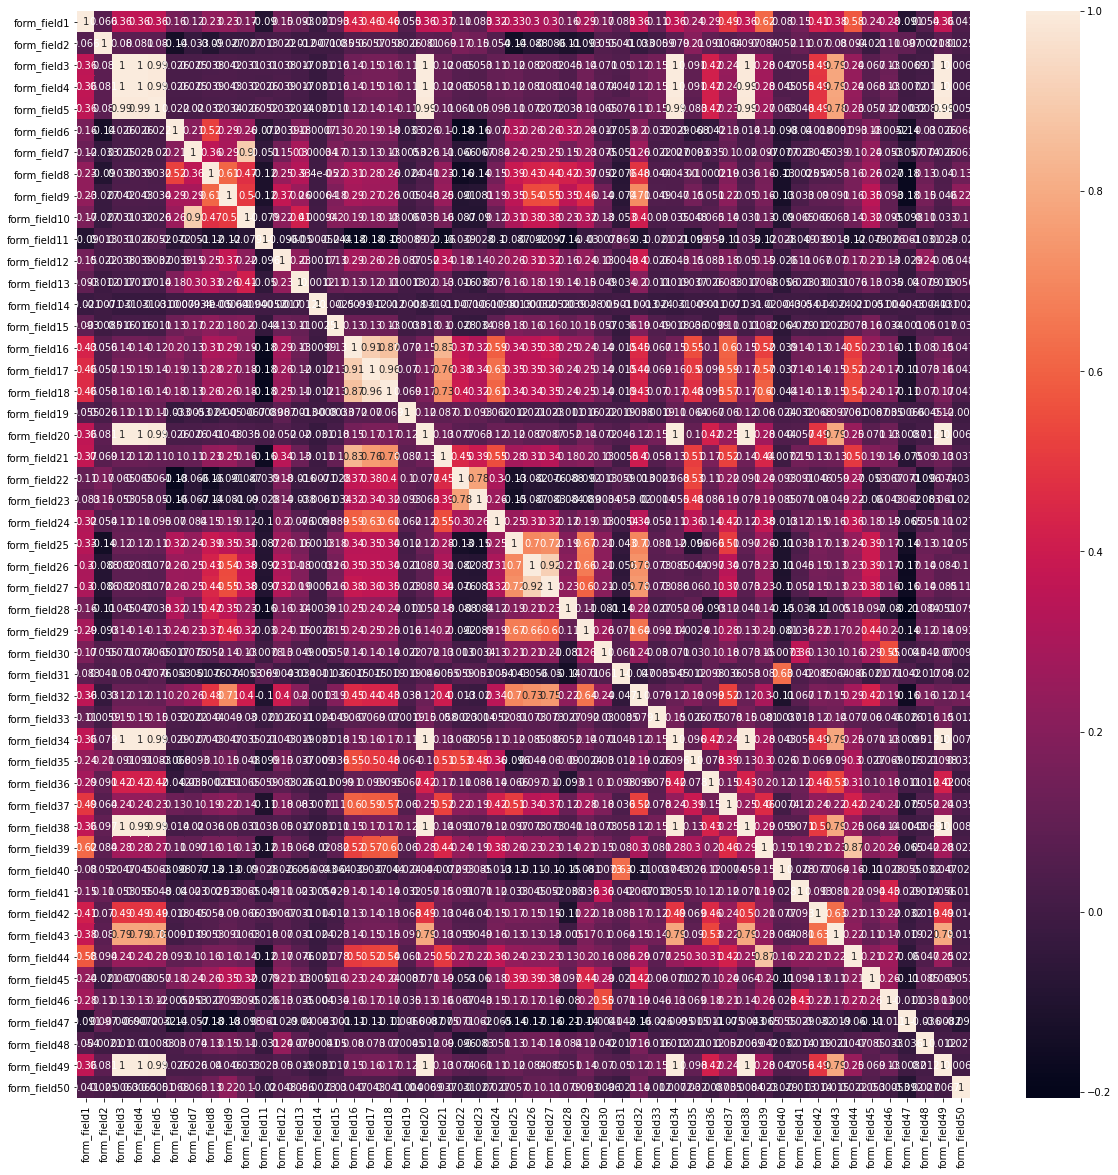

In [26]:
top_feat = corr.index
plt.figure(figsize = (20, 20))
sns.heatmap(X_[top_feat].corr(), annot = True)

In [27]:
 # Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper    

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
form_field1,NaN,0.066395,0.358717,0.359764,0.355599,0.155828,0.123642,0.230769,0.229502,0.172198,-0.089929,0.150727,0.093389,-0.021031,0.092517,0.431777,0.458290,0.460704,0.054589,0.361945,0.371567,0.108731,0.083393,0.322807,0.332689,0.302250,0.303718,0.155923,0.291305,0.171175,0.082676,0.355534,0.106149,0.360407,0.241815,0.285131,0.491966,0.364180,0.622855,0.079766,0.150026,0.413058,0.381166,0.579925,0.240394,0.281385,-0.090533,0.054497,0.361472,0.040527
form_field2,NaN,NaN,0.080174,0.080579,0.080074,-0.138547,-0.032814,-0.090430,-0.026720,-0.027382,0.012688,0.022158,-0.012013,-0.007145,-0.008544,0.055683,0.057080,0.057772,0.026108,0.081049,0.069337,0.166758,0.145292,0.054365,-0.140681,-0.088207,-0.086130,-0.113445,-0.092637,0.055030,0.041341,-0.032589,0.005889,0.079351,0.206719,0.091039,0.063798,0.097107,0.083604,0.052440,0.113881,0.070366,0.080117,0.094005,-0.021014,0.105363,0.097002,-0.002065,0.080659,0.024883
form_field3,NaN,NaN,NaN,0.999254,0.993343,0.025861,0.024715,0.038259,0.041953,0.031477,0.030722,0.038149,0.016790,-0.030710,0.015772,0.136770,0.152245,0.159336,0.111975,0.999346,0.119697,0.065471,0.053084,0.107872,0.118576,0.082369,0.082392,0.045485,0.140925,0.070512,0.049570,0.118484,0.150281,0.999621,0.091056,0.417024,0.241281,0.995056,0.276831,0.046772,0.052861,0.491087,0.787299,0.241327,0.067352,0.127518,-0.006916,0.010087,0.999499,0.006288
form_field4,NaN,NaN,NaN,NaN,0.991149,0.026420,0.025235,0.039185,0.042613,0.032431,0.025518,0.038887,0.017195,-0.030709,0.016036,0.137795,0.152967,0.159954,0.111989,0.998931,0.120604,0.065385,0.052822,0.106595,0.117680,0.081276,0.081334,0.047075,0.140412,0.073910,0.046715,0.117139,0.150386,0.999212,0.091366,0.416246,0.240333,0.994600,0.277598,0.045198,0.054992,0.490614,0.786950,0.242454,0.067842,0.133351,-0.007203,0.010339,0.998938,0.006456
form_field5,NaN,NaN,NaN,NaN,NaN,0.021725,0.020352,0.032050,0.034483,0.025820,0.052391,0.031910,0.013911,-0.030823,0.011432,0.121704,0.135747,0.142585,0.110062,0.991007,0.106645,0.061349,0.049722,0.094787,0.108797,0.072006,0.071907,0.037931,0.134865,0.064811,0.075906,0.106186,0.147800,0.991395,0.082693,0.416548,0.229409,0.986949,0.268839,0.062885,0.048353,0.488447,0.780580,0.232281,0.056543,0.121485,-0.003183,0.008272,0.992554,0.005129
form_field6,NaN,NaN,NaN,NaN,NaN,NaN,0.207660,0.522087,0.289385,0.258334,-0.071671,0.003930,0.183866,-0.000700,0.132512,0.204917,0.185440,0.177611,-0.033103,0.025788,0.104013,-0.178472,-0.162650,0.069625,0.318613,0.255407,0.255463,0.320936,0.237581,0.017363,-0.052720,0.199499,0.031733,0.028987,-0.067531,-0.042113,0.125746,0.013946,0.106078,-0.098012,-0.039541,0.018392,0.009114,0.092688,0.179975,-0.005218,-0.139724,0.030454,0.025554,0.067747
form_field7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357153,0.293446,0.900846,-0.050529,0.145371,0.296013,0.000341,0.172566,0.132331,0.127726,0.127623,-0.005317,0.026494,0.105633,-0.065900,-0.067408,0.084068,0.240682,0.252058,0.251314,0.147961,0.233896,0.075241,-0.050896,0.260338,0.022445,0.027117,0.009295,0.034974,0.104875,0.020393,0.096939,-0.077087,0.022664,0.045296,0.038585,0.104369,0.235327,0.053012,-0.057427,0.073881,0.025518,0.063251
form_field8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613040,0.472565,-0.115337,0.246116,0.327328,-0.000094,0.220330,0.305469,0.276458,0.264797,-0.024309,0.041303,0.234360,-0.157102,-0.137194,0.148636,0.391115,0.428815,0.444481,

In [28]:
# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['form_field4', 'form_field5', 'form_field10', 'form_field17', 'form_field18', 'form_field20', 'form_field27', 'form_field34', 'form_field38', 'form_field44', 'form_field49']


# 2. feature importance

This helps to know how important the independent features are to the dependent feature. This can help with feature engineering 

In [29]:
tr.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-999.00,-999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-999.0,1052.0,8.0000,2.0,-999.0,12.0,12.0,4.0,0.0,-999.0000,-999.0,0.392854,2.02,0.711632,0.0,0.0,2,-999.000000,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-999.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,-999.0000,-999.0,0.314281,8.08,0.183584,-999.0,0.0,2,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,-999.0,-999.0,0.0,16576457,22452691.0,-999.0,-999.0,-999.0,0.0,0.0,-999.000,-999.00,-999.00,-999.000,1597.5,4746.0,3164.0,60.0,15696.0,-999.0,14508.0,70.0,0.6666,0.0,-999.0,12.0,0.0,6.0,0.0,149.6805,-999.0,0.162965,18.18,0.791136,0.0,0.0,2,-999.000000,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,-999.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,-999.0,-999.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,-999.0000,-999.0,0.488884,2.02,0.685168,-999.0,0.0,2,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,-999.0,0.275000,12.12,0.438168,0.0,0.0,2,97.887502,1.427891,0.045630,0


In [30]:
X = tr.drop(columns = ['default_status'])
y = tr['default_status']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [32]:
model.feature_importances_

array([0.03667215, 0.03030506, 0.02293285, 0.0137941 , 0.00828431,
       0.01340155, 0.0194317 , 0.01492055, 0.02201554, 0.01973716,
       0.02261331, 0.01564567, 0.01853109, 0.02432401, 0.02301119,
       0.01302864, 0.01600185, 0.02818336, 0.0144821 , 0.01638349,
       0.01626466, 0.02089255, 0.01753364, 0.01635188, 0.02312758,
       0.02400058, 0.02223729, 0.03698116, 0.02736019, 0.01821651,
       0.01423615, 0.02088182, 0.02459556, 0.01495618, 0.01217809,
       0.02394491, 0.02240912, 0.02647773, 0.0119974 , 0.01351854,
       0.01249093, 0.0259575 , 0.0217233 , 0.01928804, 0.02449493,
       0.01314507, 0.03528676, 0.01233058, 0.01721211, 0.0162096 ])

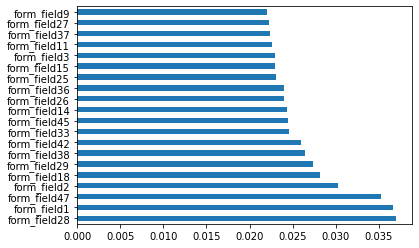

In [33]:
rank= pd.Series(model.feature_importances_, index = X.columns)
rank.nlargest(20).plot(kind= 'barh')
        


We can see that form_field28 seems to be the most important feature

# Implementing feature selection  


In [36]:
X = tr[['form_field14','form_field9','form_field15','form_field13','form_field7','form_field8','form_field50','form_field6','form_field11','form_field12','form_field48','form_field28','form_field26','form_field29','form_field22','form_field23','form_field25','form_field32','form_field30','form_field31','form_field24','form_field21','form_field1','form_field5','form_field37','form_field33','form_field4','form_field36','form_field38','form_field43','form_field3','form_field49','form_field17','form_field2','form_field16','form_field19','form_field35','form_field42','form_field34','form_field39','form_field40','form_field41','form_field47','form_field45','form_field44']]

In [37]:
y = tr['default_status']

In [38]:
te2 = te[['form_field14','form_field9','form_field15','form_field13','form_field7','form_field8','form_field50','form_field6','form_field11','form_field12','form_field48','form_field28','form_field26','form_field29','form_field22','form_field23','form_field25','form_field32','form_field30','form_field31','form_field24','form_field21','form_field1','form_field5','form_field37','form_field33','form_field4','form_field36','form_field38','form_field43','form_field3','form_field49','form_field17','form_field2','form_field16','form_field19','form_field35','form_field42','form_field34','form_field39','form_field40','form_field41','form_field47','form_field45','form_field44']]

In [39]:
X.shape , te2.shape

((56000, 45), (24000, 45))

In [40]:
features = X.columns
features.shape

(45,)

# Trying out different models 



# XGBOOSTClassifer

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state= 1234)

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,log_loss

In [51]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=2700, n_jobs=200,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=2700, n_jobs=200,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
pred1 = model.predict_proba(te2)[:, 1]
pred1

array([0.35914978, 0.3421199 , 0.44862193, ..., 0.2127878 , 0.4384208 ,
       0.13798128], dtype=float32)

In [53]:
print('XGBoostClassifier Log loss: {}'.format(log_loss(y_test, model.predict_proba(X_test)[:,1])))


XGBoostClassifier Log loss: 0.4137974650329592


In [54]:
sample['default_status'] = pred1
sample.to_csv('Xgb_pred.csv', index =False)

# LightGBM

In [55]:
from lightgbm import LGBMModel,LGBMClassifier

In [56]:
Lgb = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=5,
               metrics='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=90, n_jobs=200, num_leaves=8,
               objective='binary', random_state=94, reg_alpha=0.0,
               reg_lambda=0.0, silent=False, subsample=1.0,
               subsample_for_bin=254000, subsample_freq=0)

In [57]:
Lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=5,
               metrics='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=90, n_jobs=200, num_leaves=8,
               objective='binary', random_state=94, reg_alpha=0.0,
               reg_lambda=0.0, silent=False, subsample=1.0,
               subsample_for_bin=254000, subsample_freq=0)

In [58]:
print('LightGradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, Lgb.predict_proba(X_test)[:,1])))


LightGradientBoostingClassifier Log loss: 0.4694633914025967


In [59]:
pred2 = Lgb.predict_proba(te2)[:, 1]
pred2

array([0.34899979, 0.34840103, 0.34863778, ..., 0.30152301, 0.37887567,
       0.27414462])

In [60]:
sample['default_status'] = pred2
sample.to_csv('Lgb_pred.csv', index =False)

# CatBoostClassifier

In [61]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier


In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
def metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])


In [65]:
fold = 10
k_fold = StratifiedKFold(fold)
score_list = []
score = 0
predict = []
 
for i, (train, validation) in enumerate(k_fold.split(X, y)):
    
    Xtrain, ytrain = X.loc[train, features], y.loc[train]
    Xvalidate, yvalidate = X.loc[validation, features], y.loc[validation]
 
    model = CatBoostClassifier(n_estimators= 5000,objective = 'CrossEntropy',eval_metric = 'AUC', 
                               random_seed = 2700 ,early_stopping_rounds = 300,use_best_model = True,
                               max_depth =7, learning_rate = 0.001)
    model.fit(Xtrain, ytrain, eval_set=[(Xvalidate,yvalidate)], verbose=100)
    
    pred_ = model.predict_proba(Xvalidate)[:, 1]
    A = metric(yvalidate, pred_)
    score_list.append(A)
    score += A/fold
    
    pred = model.predict_proba(te2[features])[:, 1]
    predict.append(pred)
 
    print('Fold {} : {}'.format(i, A))
 
print()
print()
print('Avg log : ', score)

0:	test: 0.7880025	best: 0.7880025 (0)	total: 49.9ms	remaining: 4m 9s
100:	test: 0.8135311	best: 0.8136117 (72)	total: 4.98s	remaining: 4m 1s
200:	test: 0.8143231	best: 0.8143407 (199)	total: 9.91s	remaining: 3m 56s
300:	test: 0.8149244	best: 0.8149414 (299)	total: 14.9s	remaining: 3m 52s
400:	test: 0.8155484	best: 0.8155484 (400)	total: 19.9s	remaining: 3m 48s
500:	test: 0.8159733	best: 0.8159842 (497)	total: 24.9s	remaining: 3m 43s
600:	test: 0.8164789	best: 0.8164930 (596)	total: 29.8s	remaining: 3m 37s
700:	test: 0.8170889	best: 0.8170889 (700)	total: 34.6s	remaining: 3m 32s
800:	test: 0.8177512	best: 0.8177512 (800)	total: 39.5s	remaining: 3m 26s
900:	test: 0.8182888	best: 0.8182933 (899)	total: 44.4s	remaining: 3m 21s
1000:	test: 0.8188521	best: 0.8188616 (998)	total: 49.2s	remaining: 3m 16s
1100:	test: 0.8194223	best: 0.8194223 (1100)	total: 54s	remaining: 3m 11s
1200:	test: 0.8198835	best: 0.8198835 (1200)	total: 58.8s	remaining: 3m 5s
1300:	test: 0.8202595	best: 0.8202595 (130

In [71]:
pred3 = pd.DataFrame(predict).T

In [72]:
pred3.columns = ['fold_'+ str(i) for i in range(1, fold + 1)]


In [73]:
sample['default_status'] = np.mean(predict, axis=0)

In [74]:
sample.to_csv('Ctb_pred.csv', index = False)

# Blending

In [4]:
pred1 = pd.read_csv('Xgb_pred.csv')['default_status']
pred2 = pd.read_csv('Lgb_pred.csv')['default_status']
pred3 = pd.read_csv('Ctb_pred.csv')['default_status']



In [5]:
pred = (pred1*.15  + 0.3*pred2 + 0.55*pred3)

In [10]:
sample['default_status'] = pred
sample.to_csv('final_blend.csv', index =False)